In [47]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

# Q1

(256, 256, 3)
0.0


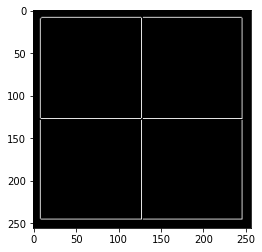

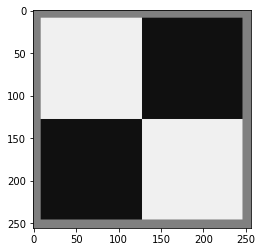

In [840]:
img = cv2.imread('input/ps1-input0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(gray, 100, 200)
print(img.shape)
print(np.median(img_edges))
plt.imshow(img_edges, cmap='gray')
plt.show()
plt.imshow(img)
plt.show()

# Q2

In [841]:
def hough_lines_acc(img_edges, theta_range=np.arange(0, 179, 1), rho_resolution=200):
    max_dim = max(img_edges.shape)
    H = np.zeros((rho_resolution, theta_range.shape[0]))
    edge_points = np.argwhere(img_edges > 0)
    rho_range = np.linspace(-2 * max_dim, 2 * max_dim, rho_resolution)
    for point in edge_points:
        x = point[1]
        y = point[0]
        for i in range(theta_range.shape[0]):
            angle = theta_range[i] * np.pi / 180
            rho = x * np.cos(angle) + y * np.sin(angle)
            rho_idx = np.abs(rho_range - rho).argmin()
            H[rho_idx, i] += 1
    return H, rho_range, theta_range
        

In [842]:
def create_hough_heatmap(H):
    H *= (255 / np.max(H))
    H = H.astype('uint8')
    plt.imshow(H, cmap='gray')
    plt.show()

In [843]:
def in_neighborhood(position, bad_positions, row_neigh, col_neigh, shape):
    position_unrav = np.unravel_index(position, shape)
    for bad_pos in bad_positions:
        bad_pos_unrav = np.unravel_index(bad_pos, shape)
        bad_i = bad_pos_unrav[0]
        bad_j = bad_pos_unrav[1]
        bad_neigh_row = [bad_i + e for e in range(-row_neigh, row_neigh + 1)]
        bad_neigh_col = [bad_j + e for e in range(-col_neigh, col_neigh + 1)]
        if position_unrav[0] in bad_neigh_row and position_unrav[1] in bad_neigh_col:
            return True
    return False

def hough_peaks(H, num_peaks, row_neigh=5, col_neigh=1):
    sorted_positions = np.argsort(H.flatten())[::-1]
    peaks_counter = 0
    position_index = 0
    maximal_positions = []
    while(peaks_counter < num_peaks):
        position = sorted_positions[position_index]
        if not in_neighborhood(position, maximal_positions, row_neigh, col_neigh, H.shape):
            maximal_positions.append(position)
            peaks_counter += 1
        position_index += 1
    maximal_positions = np.array(maximal_positions)
    maximal_is, maximal_js = np.unravel_index(maximal_positions, H.shape)
    return np.vstack((maximal_is, maximal_js)).T

In [844]:
def hough_lines_draw(img, peaks, rho_range, theta_range):
    for peak in peaks:
        rho = rho_range[peak[0]]
        angle = theta_range[peak[1]] * np.pi / 180
        sin = np.sin(angle)
        cos = np.cos(angle)
        draw_polar_line(img, rho, sin, cos)
        
        
def draw_polar_line(img, rho, sin, cos):
    if -0.01 < sin < 0.01:
        x = int(rho / cos)
        cv2.line(img, (x, 0), (x, img.shape[0]), (0, 200, 0), thickness=2)
        return
    if -0.01 < cos < 0.01:
        y = int(rho / sin)
        cv2.line(img, (0, y), (img.shape[1], y), (0, 200, 0), thickness=2)
        return
    x0 = int(rho / cos)
    y0 = 0
    y1 = img.shape[0]
    x1 = int((rho - y1 * sin) / cos)
    cv2.line(img, (x0, y0), (x1, y1), (0, 200, 0), thickness=2)

In [845]:
H, rho_range, theta_range = hough_lines_acc(img_edges, rho_resolution=4 * max(img_edges.shape))

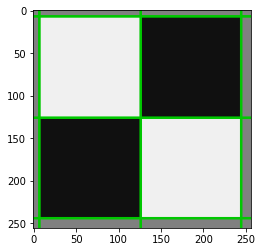

In [846]:
peaks = hough_peaks(H, 6)
new_img = cv2.imread('input/ps1-input0.png')
hough_lines_draw(new_img, peaks, rho_range, theta_range)
plt.imshow(new_img)
plt.show()

# Q3

(256, 256, 3)
0.0


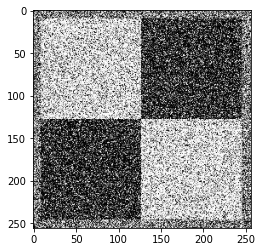

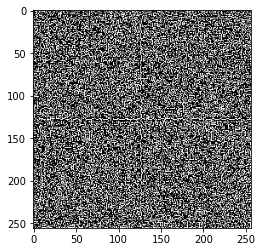

In [847]:
img_noise = cv2.imread('input/ps1-input0-noise.png')
gray_noise = cv2.cvtColor(img_noise, cv2.COLOR_BGR2GRAY)
img_noise_edges = cv2.Canny(gray_noise, 100, 200)
print(img.shape)
print(np.median(img_edges))
plt.imshow(img_noise)
plt.show()
plt.imshow(img_noise_edges, cmap='gray')
plt.show()

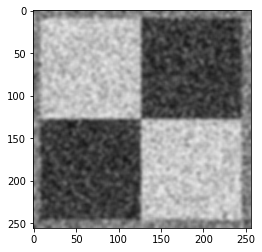

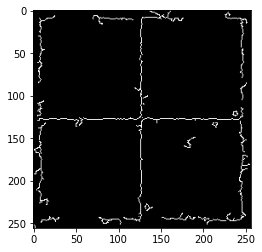

In [848]:
img_blur = cv2.GaussianBlur(img_noise, (7,7), 2)
gray_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
img_blur_edges = cv2.Canny(gray_blur, 90, 190)
plt.imshow(img_blur)
plt.show()
plt.imshow(img_blur_edges, cmap='gray')
plt.show()

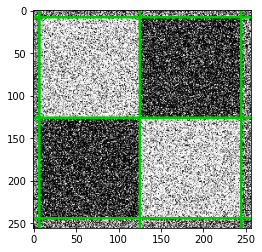

In [849]:
H, rho_range, theta_range = hough_lines_acc(img_blur_edges, rho_resolution=4 * max(img_blur_edges.shape))
new_img_noise = cv2.imread('input/ps1-input0-noise.png')
peaks = hough_peaks(H, 6)
hough_lines_draw(new_img_noise, peaks, rho_range, theta_range)
plt.imshow(new_img_noise)
plt.show()


# Q4

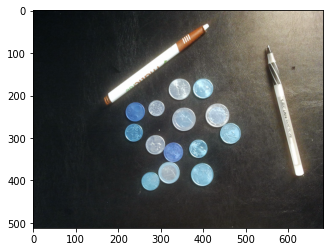

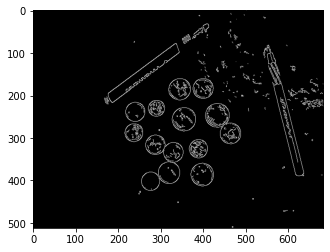

In [850]:
img_pens = cv2.imread('input/ps1-input1.png')
gray_pens = cv2.cvtColor(img_pens, cv2.COLOR_BGR2GRAY)
img_pens_edges = cv2.Canny(gray_pens, 100, 200)
plt.imshow(img_pens)
plt.show()
plt.imshow(img_pens_edges, cmap='gray')
plt.show()

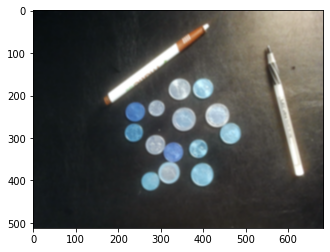

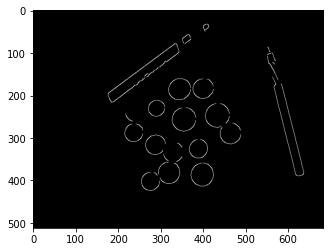

In [851]:
pens_blur = cv2.GaussianBlur(img_pens, (7,7), 2)
gray_pens_blur = cv2.cvtColor(pens_blur, cv2.COLOR_BGR2GRAY)
pens_blur_edges = cv2.Canny(gray_pens_blur, 180, 220)
plt.imshow(pens_blur)
plt.show()
plt.imshow(pens_blur_edges, cmap='gray')
plt.show()

In [852]:
H, rho_range, theta_range = hough_lines_acc(pens_blur_edges, rho_resolution=4 * max(pens_blur_edges.shape))

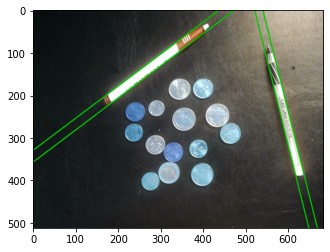

In [853]:
peaks = hough_peaks(H, 4, row_neigh=10, col_neigh=2)
new_img_pens = cv2.imread('input/ps1-input1.png')
hough_lines_draw(new_img_pens, peaks, rho_range, theta_range)
plt.imshow(new_img_pens)
plt.show()

# Q5

In [854]:
def hough_circles_acc(img_edges, radius):
    H = np.zeros(img_edges.shape)
    edge_points = np.argwhere(img_edges > 0)
    for point in edge_points:
        x = point[1]
        y = point[0]
        for i in range(360):
            theta = i * np.pi / 180
            a = int(x + radius * np.cos(theta))
            b = int(y - radius * np.sin(theta))
            if(a in range(img_edges.shape[0]) and b in range(img_edges.shape[1])):
                H[b, a] += 1
    return H

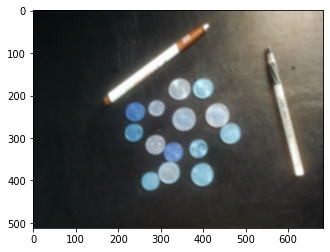

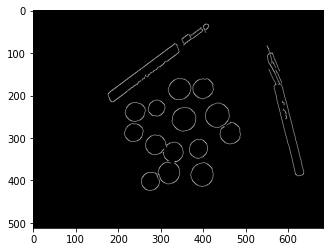

In [855]:
circles_blur = cv2.GaussianBlur(img_pens, (7,7), 3)
gray_circles_blur = cv2.cvtColor(circles_blur, cv2.COLOR_BGR2GRAY)
circles_blur_edges = cv2.Canny(gray_circles_blur, 60, 120)
plt.imshow(circles_blur)
plt.show()
plt.imshow(circles_blur_edges, cmap='gray')
plt.show()

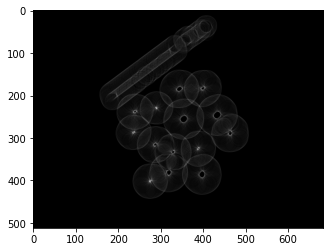

In [856]:
H = hough_circles_acc(circles_blur_edges, 20)
create_hough_heatmap(H)

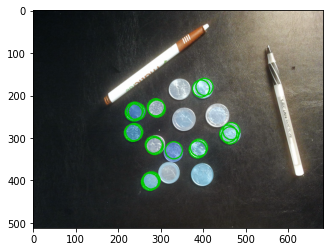

In [857]:
peaks = hough_peaks(H, 20)
new_img_pens = cv2.imread('input/ps1-input1.png')
for peak in peaks:
    x = peak[1]
    y = peak[0]
    cv2.circle(new_img_pens, (x, y), 20, (0, 200, 0), thickness=2)
plt.imshow(new_img_pens)
plt.show()    

In [858]:
def find_circles_stupid(img_edges, radius_range):
    H = np.zeros((img_edges.shape[0], img_edges.shape[1], len(radius_range)))
    for i in range(len(radius_range)):
        r = radius_range[i]
        print("r:", r)
        H[:, :, i] = hough_circles_acc(img_edges, r)
    return H, radius_range
        
        

In [859]:
def in_neighborhood_3d(position, bad_positions, first_neigh, second_neigh, third_neigh, shape):
    position_unrav = np.unravel_index(position, shape)
    for bad_pos in bad_positions:
        bad_pos_unrav = np.unravel_index(bad_pos, shape)
        bad_i = bad_pos_unrav[0]
        bad_j = bad_pos_unrav[1]
        bad_k = bad_pos_unrav[2]
        bad_neigh_i = [bad_i + e for e in range(-first_neigh, first_neigh + 1)]
        bad_neigh_j = [bad_j + e for e in range(-second_neigh, second_neigh + 1)]
        bad_neigh_k = [bad_k + e for e in range(-third_neigh, third_neigh + 1)]
        pos_i = position_unrav[0]
        pos_j = position_unrav[1]
        pos_k = position_unrav[2]
        if pos_i in bad_neigh_i and pos_j in bad_neigh_j and pos_k in bad_neigh_k:
            return True
    return False

def hough_peaks_3d(H, num_peaks, first_neigh=5, second_neigh=5, third_neigh=5):
    sorted_positions = np.argsort(H.flatten())[::-1]
    peaks_counter = 0
    position_index = 0
    maximal_positions = []
    while(peaks_counter < num_peaks):
        position = sorted_positions[position_index]
        if not in_neighborhood_3d(position, maximal_positions, first_neigh, second_neigh, third_neigh, H.shape):
            maximal_positions.append(position)
            peaks_counter += 1
        position_index += 1
    maximal_positions = np.array(maximal_positions)
    return np.unravel_index(maximal_positions, H.shape)


def draw_circle_3d_peaks(img, radius_range, peaks):
    maximal_bs, maximal_as, maximal_rs = peaks
    for i in range(len(maximal_bs)):
        a = maximal_as[i]
        b = maximal_bs[i]
        r = radius_range[maximal_rs[i]]
        cv2.circle(img, (a, b), r, (0, 200, 0), thickness=2)
    plt.imshow(img)
    plt.show()
    
    

In [389]:
H, radius_range = find_circles_stupid(circles_blur_edges, [r for r in range(20, 50)])

r: 20
r: 21
r: 22
r: 23
r: 24
r: 25
r: 26
r: 27
r: 28
r: 29
r: 30
r: 31
r: 32
r: 33
r: 34
r: 35
r: 36
r: 37
r: 38
r: 39
r: 40
r: 41
r: 42
r: 43
r: 44
r: 45
r: 46
r: 47
r: 48
r: 49


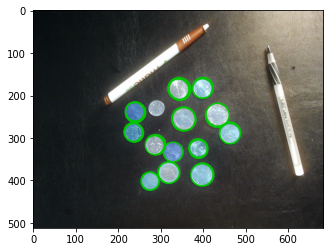

In [401]:
new_img_pens = cv2.imread('input/ps1-input1.png')
peaks = hough_peaks_3d(H, 30)
draw_circle_3d_peaks(new_img_pens, radius_range, peaks)

In [860]:
def point_in_image(img, a, b):
    return b in range(img.shape[0]) and a in range(img.shape[1])

def find_circles_smart(img_gray, img_edges, radius_range, angular_error=0):
    sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0)
    sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1)
    H = np.zeros((img_edges.shape[0], img_edges.shape[1], len(radius_range)))
    edge_points = np.argwhere(img_edges > 0)
    for point in edge_points:
        x = point[1]
        y = point[0]
        grad_x = sobelx[y, x]
        grad_y = -sobely[y, x]
        try:
            theta = np.arctan(grad_y / grad_x)
        except(ZeroDivisionError):
            theta = np.pi / 2
        for i in range(len(radius_range)):
            radius = radius_range[i]
            for e in range(-angular_error, angular_error + 1):
                angle = theta + e * np.pi / 180
                a0 = int(x + radius * np.cos(angle))
                b0 = int(y - radius * np.sin(angle))
                a1 = int(x - radius * np.cos(angle))
                b1 = int(y + radius * np.sin(angle))
            if(point_in_image(img_edges, a0, b0)):
                H[b0, a0, i] += 1
            if(point_in_image(img_edges, a1, b1)):
                H[b1, a1, i] += 1
    return H, radius_range

In [861]:
H, radius_range = find_circles_smart(gray_circles_blur, circles_blur_edges, range(10, 35), angular_error=2)

/home/user18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


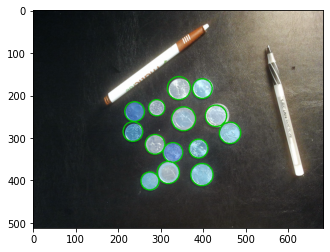

In [863]:
new_img_pens = cv2.imread('input/ps1-input1.png')
peaks = hough_peaks_3d(H, 14)
draw_circle_3d_peaks(new_img_pens, radius_range, peaks)

# Q6

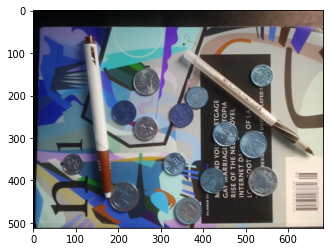

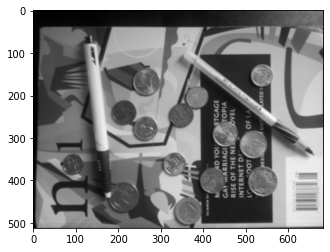

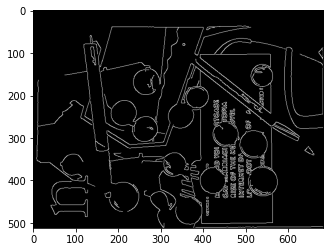

In [864]:
img_6 = cv2.imread('input/ps1-input2.png')
img_6_blur = cv2.GaussianBlur(img_6, (7,7), 1)
img_6_blur_gray = cv2.cvtColor(img_6_blur, cv2.COLOR_BGR2GRAY)
img_6_blur_edges = cv2.Canny(img_6_blur_gray, 60, 350)
plt.imshow(img_6)
plt.show()
plt.imshow(img_6_blur_gray, cmap='gray')
plt.show()
plt.imshow(img_6_blur_edges, cmap='gray')
plt.show()

In [865]:
H, rho_range, theta_range = hough_lines_acc(img_6_blur_edges, rho_resolution=4 * max(img_6_blur_edges.shape))

In [866]:
def close_parallel_line(peak, peaks, rho_range, theta_range, upper_distance, lower_distance):
    parallel_lines = peaks[np.where(np.abs(theta_range[peaks[:, 1]] - theta_range[peak[1]]) < 2)]
    if(parallel_lines.shape[0] < 2):
        return False
    closest_parallel_line = np.sort(np.abs(rho_range[parallel_lines[:, 0]] - rho_range[peak[0]]))[1]
    return rho_range[-1] * lower_distance < closest_parallel_line < rho_range[-1] * upper_distance


def get_pen_peaks(peaks, rho_range, theta_range, upper_distance=1/30, lower_distance=0):
    new_peaks = []
    for peak in peaks:
        if close_parallel_line(peak, peaks, rho_range, theta_range, upper_distance, lower_distance):
            new_peaks.append(peak)
    return new_peaks

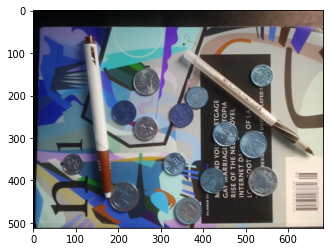

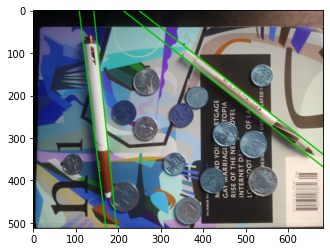

In [871]:
img_6_new = img_6.copy()
peaks = hough_peaks(H, 12, row_neigh=10)
new_peaks = get_pen_peaks(peaks, rho_range, theta_range)

hough_lines_draw(img_6_new, new_peaks, rho_range, theta_range)
plt.imshow(img_6)
plt.show()
plt.imshow(img_6_new)
plt.show()

# Q7

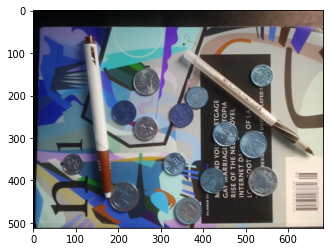

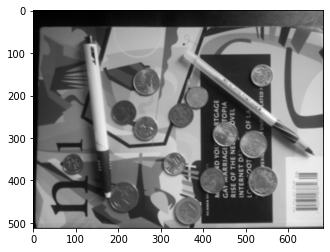

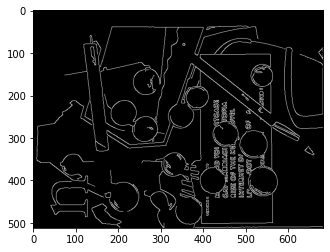

In [872]:
img_7 = cv2.imread('input/ps1-input2.png')
img_7_blur = cv2.GaussianBlur(img_7, (5,5), 1)
img_7_blur_gray = cv2.cvtColor(img_7_blur, cv2.COLOR_BGR2GRAY)
img_7_blur_edges = cv2.Canny(img_7_blur_gray, 60, 350)
plt.imshow(img_7)
plt.show()
plt.imshow(img_7_blur_gray, cmap='gray')
plt.show()
plt.imshow(img_7_blur_edges, cmap='gray')
plt.show()

In [873]:
H, radius_range = find_circles_smart(img_7_blur_gray, img_7_blur_edges, range(20, 35), angular_error=2)

/home/user18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


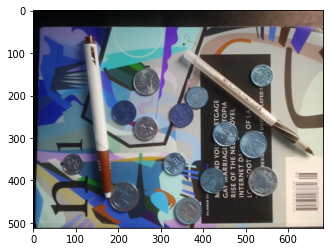

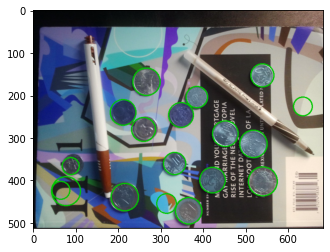

In [874]:
plt.imshow(img_7)
plt.show()
img_7_new = img_7.copy()
peaks = hough_peaks_3d(H, 18, first_neigh=30, second_neigh=30, third_neigh=10)
draw_circle_3d_peaks(img_7_new, radius_range, peaks)

# Q8

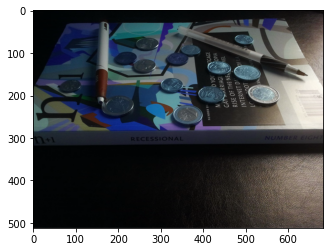

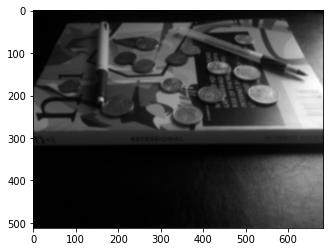

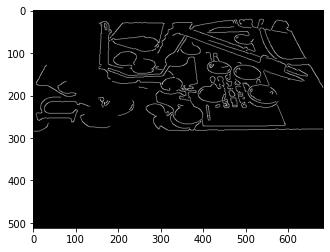

In [875]:
img_8 = cv2.imread('input/ps1-input3.png')
img_8_blur = cv2.GaussianBlur(img_8, (7,7), 2)
img_8_blur_gray = cv2.cvtColor(img_8_blur, cv2.COLOR_BGR2GRAY)
img_8_blur_edges = cv2.Canny(img_8_blur_gray, 50, 100)
plt.imshow(img_8)
plt.show()
plt.imshow(img_8_blur_gray, cmap='gray')
plt.show()
plt.imshow(img_8_blur_edges, cmap='gray')
plt.show()

In [876]:
H, rho_range, theta_range = hough_lines_acc(img_8_blur_edges, rho_resolution=4 * max(img_8_blur_edges.shape))

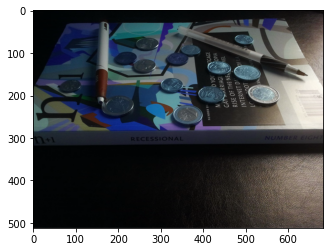

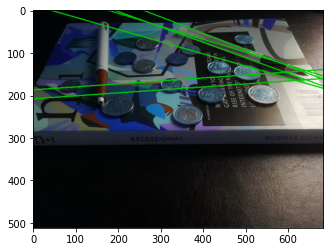

In [877]:
img_8_new = img_8.copy()
peaks = hough_peaks(H, 18, row_neigh=20, col_neigh=2)
new_peaks = get_pen_peaks(peaks, rho_range, theta_range)
hough_lines_draw(img_8_new, new_peaks, rho_range, theta_range)
plt.imshow(img_8)
plt.show()
plt.imshow(img_8_new)
plt.show()

In [878]:
H, radius_range = find_circles_smart(img_8_blur_gray, img_8_blur_edges, range(20, 50), angular_error=3)

/home/user18/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


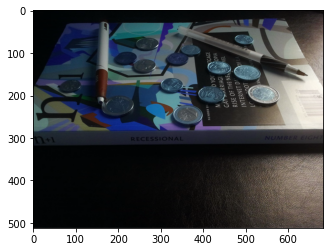

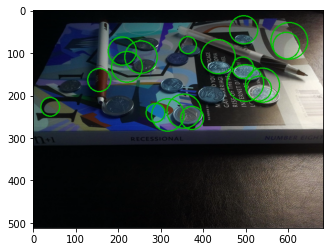

In [879]:
plt.imshow(img_8)
plt.show()
img_8_new = img_8.copy()
peaks = hough_peaks_3d(H, 18, first_neigh=30, second_neigh=30, third_neigh=10)
draw_circle_3d_peaks(img_8_new, radius_range, peaks)